<a href="https://colab.research.google.com/github/biditdas18/Projects/blob/master/TF2_0_Spam_Detection_RNN(16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Spam email detection system using LSTM

In [0]:
# Import the necessary frameworks and packages
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, LSTM, Embedding
from tensorflow.keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2020-06-01 02:05:09--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.31.81.48, 104.31.80.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  1.97MB/s    in 0.2s    

2020-06-01 02:05:09 (1.97 MB/s) - ‘spam.csv’ saved [503663/503663]



In [0]:
!head spam.csv

UnicodeDecodeError: ignored

In [0]:
# loaded the dataset on the pandas dataframe by using the name of the encodings in the argument
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
# Dropped the unnecessary colums from the pandas dataframe
df = df.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], axis=1)

In [0]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
# Renaming the remaining columns with an appropiate name
df.columns = ['labels','data']

In [0]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
# Renaming the label columns as b_labels while at the same time
# converting the entire column to a binary values mapping ham with 0 and spam with 1
df['b_labels'] = df['labels'].map({'ham':0,'spam':1})
Y = df['b_labels'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [0]:
X = df['data']
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: data, Length: 5572, dtype: object

In [0]:

# We split the entire dataset into train and test data taking the test size as 33%
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.33)

In [0]:
# We convert the sentences to sequences by using tokenizer and taking maximum vocabulary size to be 20000
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

In [0]:
# We check the total number of unique word to integer mapping in our dataset
word2idx = tokenizer.word_index
V = len(word2idx)
print("Found %s unique tokens."%V)

Found 7224 unique tokens.


In [0]:
# Padding the sequence to get a N x T matrix
X_train = pad_sequences(sequences_train)
print("Shape of X_train tensor:",X_train.shape)

# get the sequence length
T = X_train.shape[1]

Shape of X_train tensor: (3733, 189)


In [0]:
X_test = pad_sequences(sequences_test)
print('Shape of the X_test Tensor:', X_test.shape)

Shape of the X_test Tensor: (1839, 89)


In [0]:
# Create the model

# We get to choose embedding dimensionality
D = 20

# Hidden State Dimensionality
M=15

# We have set the size of embedding to be (V+1)xD,
# because the first index starts from 1 and not 0.

i = Input(shape=(T,)) # Input shape is T as it takes in sequence of integers
x = Embedding(V + 1,D)(i) # Takes in sequence of integers and outputs word vectors of shape N x T x D which we can feed into LSTM
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)

model.compile(
    loss = 'binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

r = model.fit(
    X_train,y_train,
    epochs=10,
    validation_data=(X_test,y_test)
)




Epoch 1/10
117/117 [==============================] - 9s 75ms/step - loss: 0.4694 - accuracy: 0.8567 - val_loss: 0.3662 - val_accuracy: 0.8809
Epoch 2/10
117/117 [==============================] - 8s 72ms/step - loss: 0.3989 - accuracy: 0.8586 - val_loss: 0.3489 - val_accuracy: 0.8809
Epoch 3/10
117/117 [==============================] - 8s 72ms/step - loss: 0.3609 - accuracy: 0.8586 - val_loss: 0.2962 - val_accuracy: 0.8809
Epoch 4/10
117/117 [==============================] - 8s 72ms/step - loss: 0.2384 - accuracy: 0.9033 - val_loss: 0.1484 - val_accuracy: 0.9734
Epoch 5/10
117/117 [==============================] - 9s 73ms/step - loss: 0.0918 - accuracy: 0.9879 - val_loss: 0.0843 - val_accuracy: 0.9810
Epoch 6/10
117/117 [==============================] - 8s 72ms/step - loss: 0.0471 - accuracy: 0.9936 - val_loss: 0.0710 - val_accuracy: 0.9826
Epoch 7/10
117/117 [==============================] - 8s 71ms/step - loss: 0.0314 - accuracy: 0.9949 - val_loss: 0.0641 - val_accuracy: 0.9831

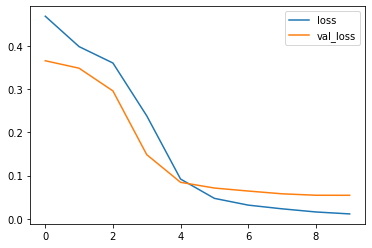

In [0]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

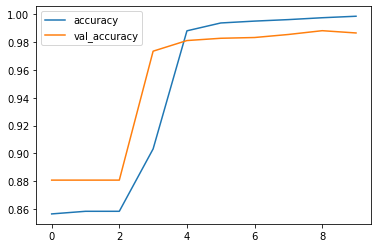

In [0]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()